# HW3

# Задача 1

In [1]:
import numpy as np

In [2]:
import math

Напишем класс

In [3]:
class OLS():
    def __init__ (self, y, X):
        self.y = y
        self.X = X
        
        self.beta  = (( np.linalg.inv  ((self.X.T).dot (self.X))).dot(self.X.T)).dot(self.y)
        self.n = X.shape[0]
        self.k = X.shape[1]
        self.sigma =( 1 /(self.n - self.k )) *  ((self.y - self.X.dot( self.beta)).T).dot( self.y - self.X.dot( self.beta))
        self.V_beta = self.sigma*np.linalg.inv(((self.X).T).dot( self.X) ) 
        
    def predict( self, X_for_predict ):
        self.y_predicted = (X_for_predict.T).dot( self.beta)
        self.V_beta_predicted = self.sigma * (
                            1 + (X_for_predict.T).dot (np.linalg.inv( (self.X.T).dot(self.X)) ).dot(X_for_predict) )
        return ( self.y_predicted, self.V_beta_predicted)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Проверим как работает наш класс

In [5]:
X = np.random.randn(100,3)
y = X.dot(np.array([1,2,3]))+np.random.randn(100)

In [6]:
X.shape

(100, 3)

In [7]:
y.shape

(100,)

In [8]:
X

array([[  1.12614199e-01,  -9.49997685e-01,   1.00413557e+00],
       [  2.49691773e-01,  -2.24311094e-01,   5.55395406e-02],
       [  5.32819258e-02,   3.41580408e-01,  -4.12688021e-01],
       [ -7.35517875e-02,   6.23760970e-01,   1.29939714e+00],
       [ -1.19790074e+00,   1.07858166e+00,   8.72707010e-01],
       [ -1.23546829e+00,  -3.06999382e-01,   6.43136416e-02],
       [ -2.87135877e-01,  -1.11798485e+00,  -4.45997285e-02],
       [ -1.97479897e+00,  -2.53218300e+00,   1.83176633e+00],
       [ -8.88457380e-01,   6.01907706e-01,  -4.44004715e-01],
       [ -9.70950006e-02,   1.75933635e+00,  -1.33563413e+00],
       [ -7.61646865e-02,  -2.03549347e+00,   3.61513562e-01],
       [ -3.13346624e+00,   2.80975696e-01,  -2.97418489e-01],
       [  1.06857168e+00,   6.85646242e-01,  -5.60998702e-01],
       [ -3.08997022e-01,   2.76045577e-01,   6.40348848e-01],
       [  9.47876580e-01,   3.02823739e+00,   6.03752835e-01],
       [ -1.13370407e+00,  -1.12849343e+00,   1.0327909

In [9]:
model = OLS(y, X)

In [10]:
model.beta

array([ 1.06759096,  2.12464756,  2.92530269])

In [11]:
model.k

3

In [12]:
X.shape

(100, 3)

In [13]:
model.sigma

0.95461178544715419

In [14]:
model.V_beta

array([[ 0.00973951, -0.00047905, -0.00133776],
       [-0.00047905,  0.00847904,  0.00127836],
       [-0.00133776,  0.00127836,  0.01087827]])

In [15]:
model.predict( np.array([1,0,1])  )

(3.9928936494650671, 0.9725540507587086)

# Задача 2

Сгенерируем данные для задачи

In [16]:
def generate_y (x ):
    s = 0
    for k in range (11):
        s += beta_array[k]* np.power(x , k)/(math.factorial(k)) + u_array[k]
    return(s )

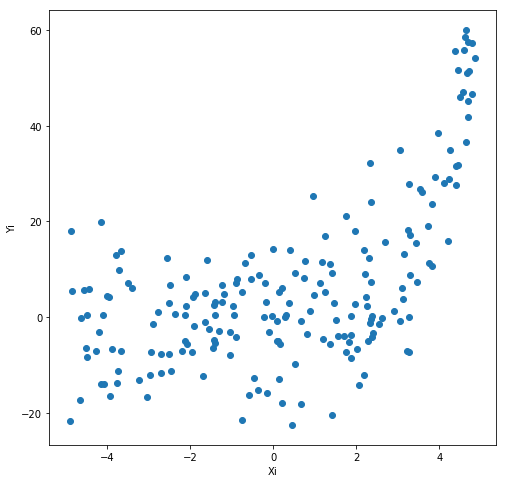

In [17]:
def generate_data ():
    beta_array = np.random.rand( 11,)
    x_array = np.random.uniform( low=-5, high=5, size=200)
    u_array = np.random.normal(0, 10, 200)
    
    def generate_y (x ):
        s = 0
        for k in range (11):
            s += beta_array[k]* np.power(x , k)/(math.factorial(k)) 
        return(s )
    generate_y_vect = np.vectorize ( generate_y)
    y_array = generate_y_vect ( x_array  ) + u_array
    return ( beta_array, x_array , u_array, y_array)


beta , x, u , y= generate_data()


plt.figure( figsize = (8,8))
plt.scatter( x,y)
plt.xlabel('Xi')
plt.ylabel('Yi')
plt.show()

In [18]:
def create_X_sample( x_arr , K):
    X_sample  = x_arr*0+1
    for k in range( 1, (K+1)):
        X_sample = np.vstack ( ( X_sample,    np.power(x_arr, k)  ) )
    return(X_sample.T)

In [19]:
def make_predict_and_line ( y ,x , k  ):
    X = create_X_sample(x,k)
    model2 = OLS( y,X)
    x_sample = np.arange(-5,5,1/200)
    X = create_X_sample(x_sample , k)
    
    y_sample = np.apply_along_axis(model2.predict , 1, X  )[:,0]
    y_sample_sigm = np.apply_along_axis(model2.predict , 1, X  )[:,1]
    return( x_sample ,y_sample, y_sample_sigm)
    


Далее с помощью класса OLS из задачи 1 для 𝐾 = 1, …, 4 оценим модель

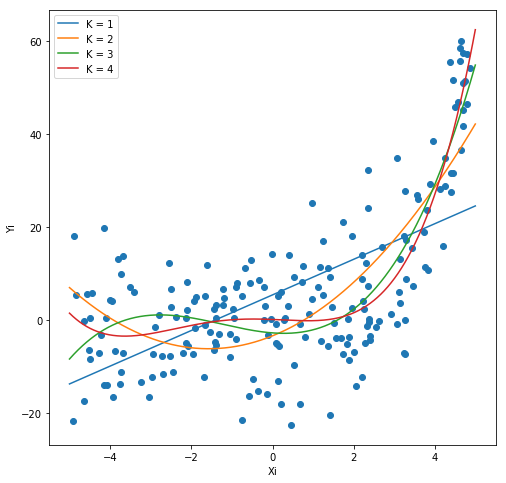

In [20]:
plt.figure( figsize = (8,8))
plt.scatter( x,y)
for k in range(1, 5):
    x_line , y_line, y_line_sigm = make_predict_and_line ( y ,x  , k )
    plt.plot(  x_line , y_line, label  = str( 'K = '  + str(k)))
plt.legend()
plt.xlabel('Xi')
plt.ylabel('Yi')
plt.show()

Для последней регрессии при 𝐾 = 4 нарисуйте диаграмму, на которой будет
изображено облако точек, линия регрессии и 90%-ный доверительный интервал для прогнозных значений 

In [21]:
import scipy 
from  scipy import stats

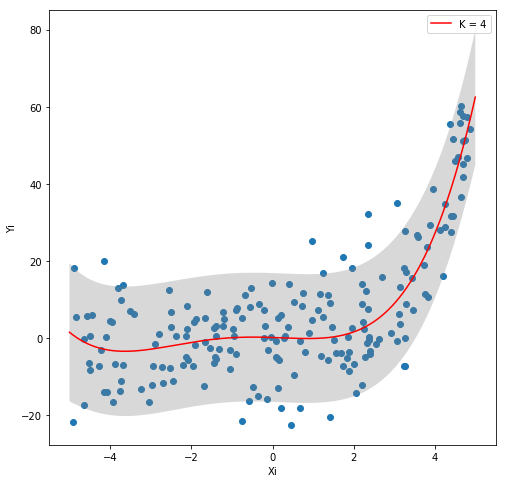

In [22]:
plt.figure( figsize = (8,8))
plt.scatter( x,y)

x_line , y_line , y_line_sigm = make_predict_and_line ( y ,x  , 4 )
plt.plot(  x_line , y_line, label  = str( 'K = '  + str(k)) , c = 'red')
t = scipy.stats.t.ppf( 0.95  , 100)
plt.fill_between(x_line,( y_line+ t*np.sqrt(y_line_sigm)) ,
                 (y_line- t*np.sqrt(y_line_sigm)),
                 alpha = 0.3,
                 facecolor='grey' )


plt.legend()
plt.xlabel('Xi')
plt.ylabel('Yi')
plt.show()

# Задача 3

In [23]:
A = np.random.standard_normal((100,100) )

In [24]:
t = scipy.stats.t.ppf( 0.9  , 100) # квантиль распределения

In [25]:
a_std = A.std(axis = 0)*t / np.sqrt(100)

In [26]:
a_mean =  A.mean(axis = 0)

In [27]:
a_up = a_mean + a_std
a_low = a_mean - a_std

In [28]:
for i in range( 100):
    print ( a_low[i] , a_up[i]  )

-0.0835405374654 0.141071272354
-0.134791260756 0.0986094561685
-0.0510353955885 0.203476236132
-0.0932270388137 0.169767741606
-0.0933765127017 0.153448476623
0.0504498986554 0.319601483588
-0.0211999983706 0.222653691426
-0.171393754226 0.0666529574578
0.0323812177923 0.319816037013
0.0230951097997 0.301901344666
-0.12657429036 0.13156742315
-0.170606025612 0.0912864629817
-0.24164448557 -0.00965677310063
-0.10384815751 0.190730736464
-0.205024817707 0.0668921514275
-0.054653890652 0.223207422866
-0.046581501525 0.236634295897
-0.0878233088933 0.14611985342
-0.108695766578 0.1559470502
0.0145950573683 0.266900223495
-0.0118614442655 0.266113825056
-0.0420976102724 0.222371419684
-0.223758786679 0.056572779981
-0.393402444512 -0.142230044653
-0.0448674241249 0.160377812111
-0.108482457442 0.164099938007
-0.243135466222 0.0150222193212
-0.115616502166 0.146353423009
-0.188854091429 0.0557054199373
-0.0659327366771 0.200341787579
-0.257022959094 -0.0124814065963
-0.235929638774 0.018699

In [29]:
array = [True]*100
for i in range( 100):
    if ( ( 0< a_low[i]) or    (0 >a_up[i])  ):
        array[i] =False

In [30]:
sum(array)

80

Сделаем аналогично для строки

In [31]:
b_std = A.std(axis = 1)*t / np.sqrt(100)
b_mean =  A.mean(axis = 1)
b_up = b_mean + b_std
b_low = b_mean - b_std

for i in range( 100):
    print ( b_low[i] , b_up[i]  )

-0.186935892402 0.0808144947041
-0.0993632434161 0.147645238278
-0.127973356261 0.129709814814
0.0197181043349 0.277155121464
-0.287947830832 -0.034537152862
-0.0596262612238 0.190208124266
-0.219993101026 0.029458236407
-0.208549611137 0.0315548506345
0.0746045842764 0.310104181658
-0.230955708903 0.0393741837979
0.0602767182956 0.301902337658
-0.141439461915 0.115784746754
-0.11612534462 0.130900498053
0.0865773648994 0.36265766474
-0.148574826604 0.14334139701
-0.163946204959 0.0941607018399
-0.34877147318 -0.0838923222309
-0.210594878207 0.0101181707525
-0.143494929058 0.140242633305
-0.124350848742 0.154297814843
-0.0491272786383 0.192374047479
-0.0502239773447 0.1592240905
0.0608671799505 0.320916697213
-0.147685180216 0.0939813091421
-0.203263907613 0.0512698757331
-0.120816277632 0.152702406872
-0.18194376267 0.0782205173848
-0.155441760391 0.0742699316862
-0.103012956667 0.180498050622
-0.16443363383 0.0671289220163
-0.213004083861 0.0473400829268
-0.305939571347 -0.0031900682

In [32]:
b_array = [True]*100
for i in range( 100):
    if ( ( 0< b_low[i]) or    (0 >b_up[i])  ):
        b_array[i] =False

In [33]:
sum(b_array)

81

Генератор не всегда генерит нормально распределенные числа, так как меньше 90% чисел попадают в доверительный интервал 

# Задача 4

In [34]:
import pandas as pd

In [35]:
data = pd.read_csv('goalies-2014-2016.csv', sep = ';' )  # считаем данные
data.head()

,n,player,season,team,position,games_played,games_started,wins,losses,overtime_losses,...,saves,goals_against,save_percentage,goal_against_average,time_on_ice,shutouts,goals,assists,points,penalty_minutes
0,1,Cam Talbot,2016-17,EDM,G,73,73,42,22,8,...,1946,171,0.919,2.39,4294:00,7,0,0,0,4
1,2,Braden Holtby,2016-17,WSH,G,63,63,42,13,6,...,1563,127,0.925,2.07,3680:10,9,0,0,0,0
2,3,Sergei Bobrovsky,2016-17,CBJ,G,63,63,41,17,5,...,1727,127,0.931,2.06,3707:04,7,0,0,0,8
3,4,Devan Dubnyk,2016-17,MIN,G,65,63,40,19,5,...,1701,141,0.923,2.25,3758:00,5,0,0,0,10
4,5,Tuukka Rask,2016-17,BOS,G,65,64,37,20,5,...,1473,137,0.915,2.23,3679:30,8,0,2,2,0


Выведем первые 5 строк первых шести столбцов полученного набора данных.

In [36]:
data.iloc[0:5,0:6]   

,n,player,season,team,position,games_played
0,1,Cam Talbot,2016-17,EDM,G,73
1,2,Braden Holtby,2016-17,WSH,G,63
2,3,Sergei Bobrovsky,2016-17,CBJ,G,63
3,4,Devan Dubnyk,2016-17,MIN,G,65
4,5,Tuukka Rask,2016-17,BOS,G,65


(2) Проверьте, что процент отраженных бросков (save_percentage) сосчитан правильно
(с точностью до третьего знака после запятой). Для этого сосчитайте его сами (с
использованием показателей числа отраженных бросков (saves) и общего числа
бросков (shots_against)) и найдите наибольшее абсолютное отклонение. 

In [37]:
np.max(np.abs(data.save_percentage - data.saves / data.shots_against))

0.00059325605900950595

(3) Вычислите средние и стандартные отклонения для следующих показателей: число
проведенных игр (games_played), число пропущенных шайб (goals_against), про-
цент отраженных бросков (save_percentage). 

Среднее:

In [38]:
data[['games_played', 'goals_against', 'save_percentage'] ].apply(np.mean)

games_played       28.476703
goals_against      67.605735
save_percentage     0.901179
dtype: float64

Стандартное отклонение

In [39]:
data[['games_played', 'goals_against', 'save_percentage'] ].apply(np.std)

games_played       22.245421
goals_against      53.256081
save_percentage     0.071132
dtype: float64

Для сезона 2016-17 найдите вратаря (player) с наибольшим процентом отраженных
бросков (save_percentage) среди тех, кто провел более 40 матчей (games_played)

In [40]:
s = data[  (data.season ==  '2016-17' ) &
     (data.games_played >40)   ]

In [41]:
s[s.save_percentage == max(s.save_percentage)][['player','save_percentage'] ]

,player,save_percentage
2,Sergei Bobrovsky,0.931


Для каждого сезона найдите вратаря, который отразил наибольшее число бросков
(saves).

In [42]:
data.sort_values('saves', ascending=False).groupby('season', as_index=False).first()[  ['season', 'player', 'saves']   ]

,season,player,saves
0,2014-15,Braden Holtby,1887
1,2015-16,Henrik Lundqvist,1788
2,2016-17,Cam Talbot,1946


#сделал немного нетривиально: сортируем по убыванию saves наш массив, сгруппипуем по сезонам и в каждом сезоне возьмем первое значение

(6) Найдите всех вратарей, которые в каждом из трех сезонов выигрывали не менее 30
матчей (wins). 

In [43]:
x = pd.DataFrame (data.groupby('player').min().wins )

In [44]:
x ['seasons'] =  data.groupby('player').count().season

In [49]:
x[ (x.wins >=30) & (x.seasons == 3) ]

,wins,seasons
player,,
Braden Holtby,41,3
Corey Crawford,32,3
Devan Dubnyk,32,3
Henrik Lundqvist,30,3
Pekka Rinne,31,3
Tuukka Rask,31,3
